In [1]:
# Compare algorithms

/home/arvind/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/arvind/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/arvind/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REA

LR: 0.773428 (0.053375)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.696548 (0.061601)
NB: 0.755178 (0.042766)
SVM: 0.760424 (0.052931)


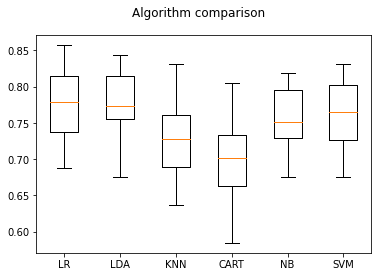

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

filename = 'pima-indians-diabetes.data.csv'
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe = read_csv(filename, names = names)
array = dataframe.values
X= array[:,0:8]
Y= array[:,8]
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 7)
    cv_results = cross_val_score(model,X,Y,cv=kfold,scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)
fig = pyplot.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
